In [1]:
import glob
import pandas as pd
import plugin

# 1500 randomly selected APKs
apks_2020 = list(glob.iglob("../../dataset/MalDroid-2020/raw-curated-dataset/**/*.apk", recursive=True))
apks_2020_summary = pd.read_csv('../../dataset/MalDroid-2020/raw-dataset/summary.csv')

apks_2017 = list(glob.iglob("../../dataset/CICMalAnal2017/raw-dataset/**/*.apk", recursive=True))

In [2]:
dataset_2017 = []
dataset_2020 = []
sha_hashes = []

for apk in apks_2017:
    sha256 = plugin.sha256sum(apk)
    if sha256 not in sha_hashes:
        md5 = plugin.md5sum(apk)
        split_path = apk.split("/")
        malware_type = split_path[-3]
        family = split_path[-2]
        if family.startswith('Benign'):
            family = family.split('_')[-1]
            dataset_2017.append({
                'file_path': apk,
                'sha256': sha256,
                'md5': md5,
                'type': 'benign',
                'family': family
            })
        else:
            dataset_2017.append({
                'file_path': apk,
                'sha256': sha256,
                'md5': md5,
                'type': malware_type,
                'family': family
            })
        sha_hashes.append(sha256)

for apk in apks_2020:
    sha256 = plugin.sha256sum(apk)
    if sha256 not in sha_hashes:
        md5 = plugin.md5sum(apk)
        split_path = apk.split("/")
        malware_type = apks_2020_summary.loc[apks_2020_summary['sha256'] == sha256]['type']
        dataset_2020.append({
            'file_path': apk,
            'sha256': sha256,
            'md5': md5,
            'type': 'benign',
            'family': None
        })
        sha_hashes.append(sha256)

df_2017 = pd.DataFrame(dataset_2017)
df_2020 = pd.DataFrame(dataset_2020)

df_2017['file_path'] = df_2017['file_path'].str.replace('../../', './')
df_2020['file_path'] = df_2020['file_path'].str.replace('../../', './')

df = pd.concat([df_2020, df_2017])


In [3]:
df.head()

,file_path,sha256,md5,type,family
0,./dataset/MalDroid-2020/raw-curated-dataset/bb...,bbe2134b409de706e4098b5895998f350a4f98c2bcece9...,04ebbb589ce740542ef1b9b81694331c,benign,None
1,./dataset/MalDroid-2020/raw-curated-dataset/a6...,a600906705542d5f317fb082a185606fd3d449e959e9ec...,d7ef76b4b19ae2958fcf9b839f1c438f,benign,None
2,./dataset/MalDroid-2020/raw-curated-dataset/c7...,c715678470df19940f6b036ad9266d08cb22b8956ff120...,aa22acdb963fc678e059f1aa3ba472e9,benign,None
3,./dataset/MalDroid-2020/raw-curated-dataset/35...,35f75dbd8aa4f44d8ac6a5923300469de501eef1720861...,7b67941e66138114f5c077da13c945b5,benign,None
4,./dataset/MalDroid-2020/raw-curated-dataset/88...,88dba8548ff037af839434ad6e66d6dd6a190d9da6e02c...,045b911a262b21c8d1a068a2a3e643f7,benign,None


In [4]:
# Dataset Summary

df_mal = df[df['type'] != 'benign']
df_ben = df[df['type'] == 'benign']

num_mal = len(df_mal)
num_ben = len(df_ben)
num_tot = num_mal + num_ben

perc_mal = num_mal / num_ben

print("Total samples:", num_tot)
print("Malicious samples:", num_mal)
print("Benign samples:", num_ben)
print("Percentage malicious samples:", perc_mal)

Total samples: 3514
Malicious samples: 317
Benign samples: 3197
Percentage malicious samples: 0.09915545824210197


In [5]:
import matplotlib.pyplot as plt

def plot_pie(df_, column_):
    data = df_[column_].value_counts()
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {column_}')
    plt.show()

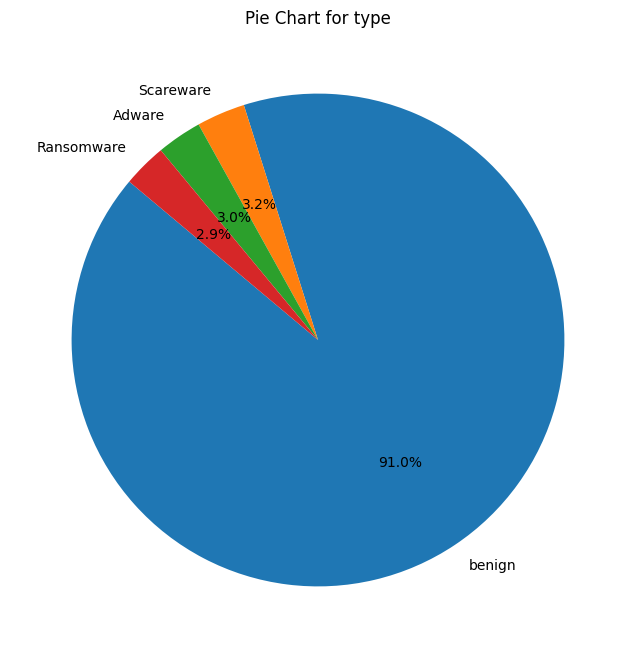

In [6]:
plot_pie(df_=df, column_='type')

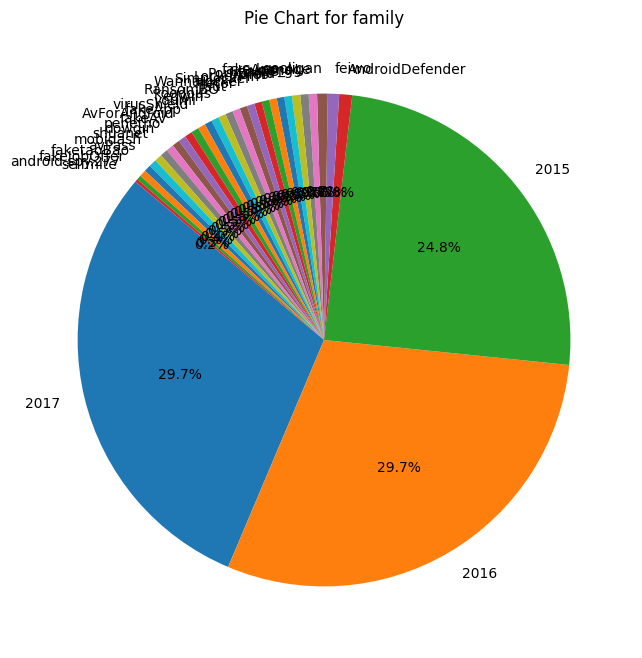

In [7]:
plot_pie(df_=df, column_='family')

In [10]:
df.to_csv('../../dataset/dataset-joined.csv', index=False)
df_2017.to_csv('../../dataset/CICMalAnal2017/dataset.csv', index=False)
df_2020.to_csv('../../dataset/MalDroid-2020/dataset.csv', index=False)